In [1]:
import pandas as pd
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [2]:
# Conexion a drive y descompresión de los corpus
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


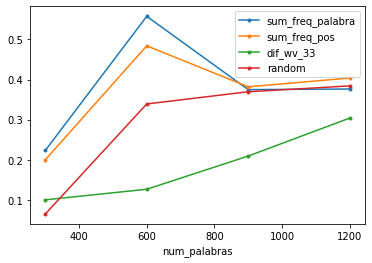

In [5]:
sufijos = ['_sum_freq_palabra.csv','_sum_freq_pos.csv', '_dif_wv_33.csv', '_random.csv']
i = 0
for  suf in sufijos:
  raiz = "/content/drive/MyDrive/COLAB - TFM/"
  for MAX_LEN in [50]: 
    num_reg = [1200, 900, 600, 300]
    for num in num_reg:
        for lan in ["en", "es"]:
          resultado = "resultado_"+str(num)+suf
          # print(raiz+resultado+"_validacion_"+str(MAX_LEN)+"_"+lan+".csv")
          if i == 0:
            df_resultado = pd.read_csv(raiz+resultado+"_validacion_"+str(MAX_LEN)+"_"+lan+".csv", sep=";", index_col=0)
            df_resultado["archivo"] = suf.split(".")[0][1:]
            df_resultado["MAX_LEN"] = MAX_LEN
            df_resultado["lan"] = lan
            df_resultado["num"] = num
            i += 1
          else:
            df_tmp = pd.read_csv(raiz+resultado+"_validacion_"+str(MAX_LEN)+"_"+lan+".csv", sep=";", index_col=0)
            df_tmp["archivo"] = suf.split(".")[0][1:]
            df_tmp["MAX_LEN"] = MAX_LEN
            df_tmp["lan"] = lan
            df_tmp["num"] = num
            df_resultado = pd.concat([df_resultado, df_tmp], axis=0)
resultados = []
for archivo in df_resultado["archivo"].unique():
  for num in df_resultado["num"].unique():
    f1 = f1_score(df_resultado[(df_resultado["archivo"] == archivo)&(df_resultado["num"] == num)]["valid_tags"], df_resultado[(df_resultado["archivo"] == archivo) & (df_resultado["num"] == num)]["pred_tags"], average = "macro")
    resultados.append([archivo, num, f1])
df_val = pd.DataFrame(resultados, columns=["dataset", "num_palabras","f1_score"])
for dataset in df_val["dataset"].unique():
  df_val[df_val["dataset"] == dataset].set_index("num_palabras")["f1_score"].plot(label=dataset, style='.-')
  plt.legend()

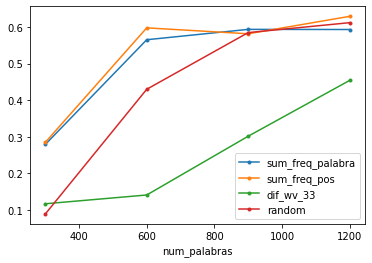

In [8]:
sufijos = ['_sum_freq_palabra.csv','_sum_freq_pos.csv', '_dif_wv_33.csv', '_random.csv']
i = 0
for  suf in sufijos:
  raiz = "/content/drive/MyDrive/COLAB - TFM/"
  NUM_EPOCHS = 150
  for MAX_LEN in [50]:
    num_reg = [1200, 900, 600, 300]
    for num in num_reg:
        for lan in ["en", "es"]:
          resultado = "resultado_"+str(num)+suf
          # print(raiz+resultado+"_validacion_"+str(MAX_LEN)+"_"+lan+".csv")
          if i == 0:
            df_resultado = pd.read_csv(raiz+resultado+"_entrenamiento_"+str(MAX_LEN)+"_"+lan+".csv", sep=";", index_col=0)
            df_resultado["archivo"] = suf.split(".")[0][1:]
            df_resultado["MAX_LEN"] = MAX_LEN
            df_resultado["lan"] = lan
            df_resultado["num"] = num
            i += 1
          else:
            df_tmp = pd.read_csv(raiz+resultado+"_entrenamiento_"+str(MAX_LEN)+"_"+lan+".csv", sep=";", index_col=0)
            df_tmp["archivo"] = suf.split(".")[0][1:]
            df_tmp["MAX_LEN"] = MAX_LEN
            df_tmp["lan"] = lan
            df_tmp["num"] = num
            df_resultado = pd.concat([df_resultado, df_tmp], axis=0)
resultados = []
for archivo in df_resultado["archivo"].unique():
  for num in df_resultado["num"].unique():
    f1 = f1_score(df_resultado[(df_resultado["archivo"] == archivo)&(df_resultado["num"] == num)]["valid_tags"], df_resultado[(df_resultado["archivo"] == archivo) & (df_resultado["num"] == num)]["pred_tags"], average = "macro")
    resultados.append([archivo, num, f1])
df_train = pd.DataFrame(resultados, columns=["dataset", "num_palabras","f1_score"])
for dataset in df_train["dataset"].unique():
  df_train[df_train["dataset"] == dataset].set_index("num_palabras")["f1_score"].plot(label=dataset, style='.-')
  plt.legend()
